In [4]:
#importación de modulos
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing(use_latex=True)

In [8]:
k=1
for i in [-20,-10,0,10,20]:
    for j in [-20,-10,0,10,20]:
        k=k+1
        filename=str(k)
        c,cplot,bordeataque,bordesalida=aguilacalzada(i,j,1,0.25)
        plt.savefig('geometria/'+filename+'.png')
        plt.clf()


In [5]:
def aguilacalzada(angulocentral,angulolateral,b=1,articulacion=0.25):
    """
    """
    y=symbols('y')
    x=symbols('x')

    x=-7*y**6
    z=x.subs(y,b/2)-0.015*(1+cos(2*(np.pi*y)))
    ccuartos=x-(x-z)/4
    c=(x-z)

    huesocentral=-tan(rad(angulocentral))*abs(y)+ccuartos #se crean unos huesos en la línea c/4, centrales y laterales
    huesolateral=-tan(rad(angulolateral))*abs(y)+ccuartos-(tan(rad(angulocentral))-tan(rad(angulolateral)))*abs(articulacion)

    x=lambdify(y,x)
    z=lambdify(y,z)
    ccuartos=lambdify(y,ccuartos)
    cplot=lambdify(y,c)
    huesocentral=lambdify(y,huesocentral)
    huesolateral=lambdify(y,huesolateral)

    def hueso(y):
        x=np.zeros(y.size)
        for i in range(y.size):
            if abs(y[i])<=articulacion :
                x[i]=huesocentral(y[i])
            else: 
                x[i]=huesolateral(y[i])
        return x
    

    y=np.linspace(-b/2,b/2,101)
    bordeataque=hueso(y)+cplot(y)/4
    bordesalida=hueso(y)-3*cplot(y)/4

    plt.plot(y,bordesalida,label='Borde Salida')
    plt.plot(y,bordeataque,label='Borde Ataque')
    plt.plot(y,hueso(y),'--',label='Línea de c/4')
    plt.legend(fontsize='x-large')
    plt.axis('equal')
    fig=plt.gcf() #para dimensionar la figura
    fig.set_size_inches(16, 8)
    
    return c,cplot,bordeataque,bordesalida

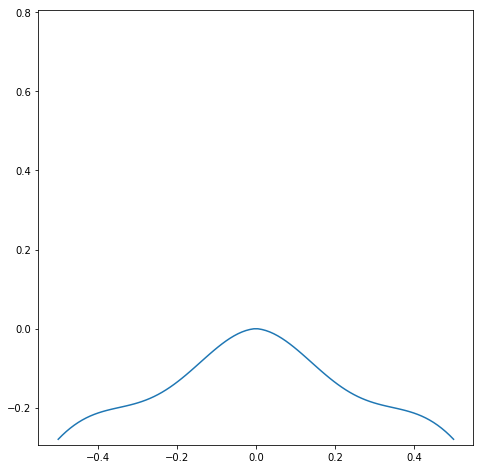

In [18]:
y=symbols('y')
x=symbols('x')
b=1

x=(cos(2*(2*np.pi*y))+2)*0.1*(1/(abs(y)+2))-y**2-(cos(2*(2*np.pi*0))+2)*0.1*(1/(abs(0)+2))

x=lambdify(y,x)
y=np.linspace(-b/2,b/2,100)
plt.plot(y, x(y))

plt.axis('square')
fig=plt.gcf() #para dimensionar la figura
fig.set_size_inches(8, 8)

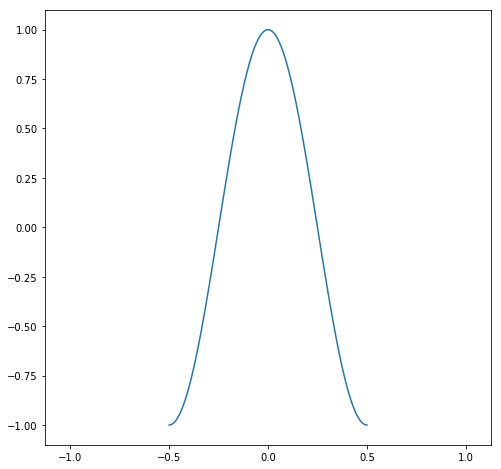

In [37]:
y=symbols('y')
x=symbols('x')
b=1

x=cos((2*np.pi*y))

x=lambdify(y,x)
y=np.linspace(-b/2,b/2,100)
plt.plot(y, x(y))

plt.axis('equal')
fig=plt.gcf() #para dimensionar la figura
fig.set_size_inches(8, 8)

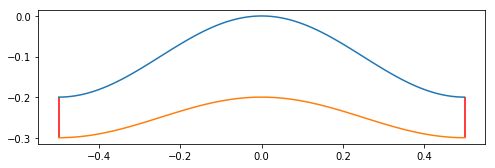

In [111]:
#definición de vista en planta

#Inputs para generar la vista en planta
a1=1
a2=0.4
c=0.1#cuerda de los extremos
b=1 #envergadura

#definición de la geometría exterior de la planta. 
#Se puede modificar la geometría del borde de ataque y borde de salida
y=symbols("y")
bordeataque=0.1*cos((2*np.pi*y))-0.1*cos((2*np.pi*0))#-(a1*y)**2 #ejemplo de borde de ataque parabólica
plotbordeataque=lambdify(y,bordeataque)
x=np.linspace(-b/2,b/2,100) #se van a utilizar para la representación 100 puntos en el eje X
plt.plot(x, plotbordeataque(x))
plt.vlines(-b/2,bordeataque.subs(y,-b/2),bordeataque.subs(y,-b/2)-c,colors='red')
plt.vlines(b/2,bordeataque.subs(y,b/2),bordeataque.subs(y,b/2)-c,colors='red')
bordesalida=0.05*cos((2*np.pi*y))-0.05*cos((2*np.pi*b/2))+bordeataque.subs(y,b/2)-c
#bordesalida=-(a2*y)**2+(bordeataque.subs(y,-b/2)-c)+(a2*b/2)**2 #ejemplo de borde de salida con forma parabólica
plotbordesalida=lambdify(y,bordesalida)
plt.plot(x, plotbordesalida(x))

plt.axis('scaled')
fig=plt.gcf() #para dimensionar la figura
fig.set_size_inches(8, 8)

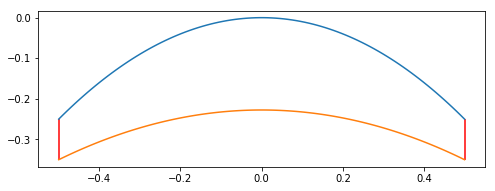

In [113]:
#definición de vista en planta

#Inputs para generar la vista en planta
a1=1
a2=0.7
c=0.1#cuerda de los extremos
b=1 #envergadura

#definición de la geometría exterior de la planta. 
#Se puede modificar la geometría del borde de ataque y borde de salida
y=symbols("y")
bordeataque=-(a1*y)**2 #ejemplo de borde de ataque parabólica
plotbordeataque=lambdify(y,bordeataque)
x=np.linspace(-b/2,b/2,100) #se van a utilizar para la representación 100 puntos en el eje X
plt.plot(x, plotbordeataque(x))
plt.vlines(-b/2,bordeataque.subs(y,-b/2),bordeataque.subs(y,-b/2)-c,colors='red')
plt.vlines(b/2,bordeataque.subs(y,b/2),bordeataque.subs(y,b/2)-c,colors='red')

bordesalida=-(a2*y)**2+(bordeataque.subs(y,-b/2)-c)+(a2*b/2)**2 #ejemplo de borde de salida con forma parabólica
plotbordesalida=lambdify(y,bordesalida)
plt.plot(x, plotbordesalida(x))

plt.axis('scaled')
fig=plt.gcf() #para dimensionar la figura
fig.set_size_inches(8, 8)

In [100]:
y.size

In [151]:
cplot(0)